In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)


In [2]:
df = pd.read_csv('StudentsPerformance.csv')


In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:

df.rename(columns={
    "race/ethnicity": "race",
    "parental level of education": "parent_education",
    "test preparation course": "test_prep",
    "math score": "math_score",
    "reading score": "reading_score",
    "writing score": "writing_score"
}, inplace=True)

df.columns


Index(['gender', 'race', 'parent_education', 'lunch', 'test_prep',
       'math_score', 'reading_score', 'writing_score'],
      dtype='object')

In [5]:
df.isnull().sum()

gender              0
race                0
parent_education    0
lunch               0
test_prep           0
math_score          0
reading_score       0
writing_score       0
dtype: int64

In [6]:
df['average_score'] = (df['math_score'] + df['reading_score'] + df['writing_score']) / 3

In [7]:
df.head()

,gender,race,parent_education,lunch,test_prep,math_score,reading_score,writing_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


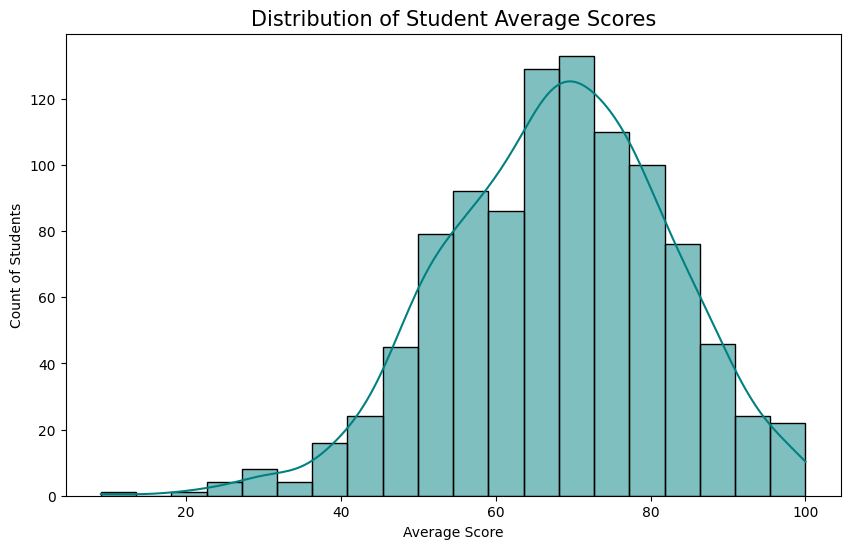

In [8]:
# Cell 5
plt.figure(figsize=(10, 6))
sns.histplot(df['average_score'], kde=True, color='teal', bins=20)

plt.title('Distribution of Student Average Scores', fontsize=15)
plt.xlabel('Average Score')
plt.ylabel('Count of Students')
plt.show()


C:\Users\mayank goyal\AppData\Local\Temp\ipykernel_17124\1714782455.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='test_prep', y='average_score', data=df, palette='pastel')


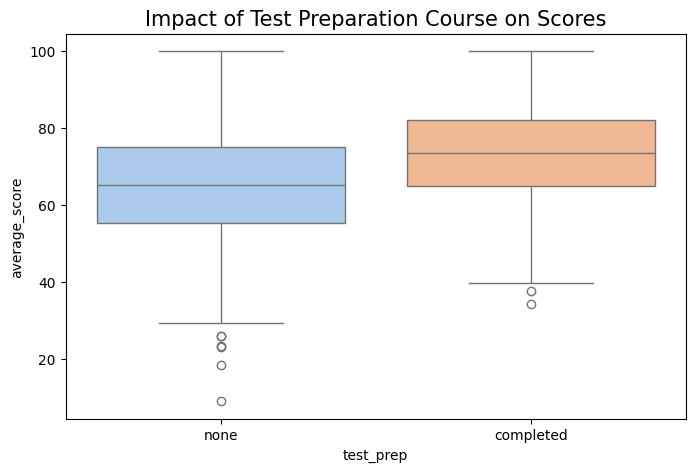

In [9]:
# Cell 6
plt.figure(figsize=(8, 5))
sns.boxplot(x='test_prep', y='average_score', data=df, palette='pastel')

plt.title('Impact of Test Preparation Course on Scores', fontsize=15)
plt.show()


C:\Users\mayank goyal\AppData\Local\Temp\ipykernel_17124\1084707647.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='average_score', y='parent_education', data=df, order=order, palette='viridis')


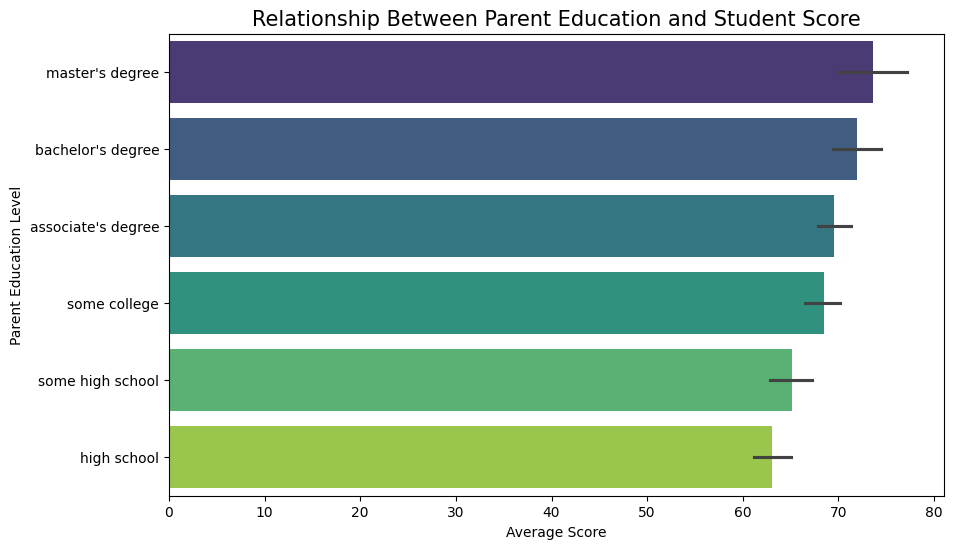

In [10]:
# Cell 7
plt.figure(figsize=(10, 6))

# We sort the groups so the "smartest" group is at the top!
order = df.groupby('parent_education')['average_score'].mean().sort_values(ascending=False).index

# Create a Bar Plot
sns.barplot(x='average_score', y='parent_education', data=df, order=order, palette='viridis')

plt.title('Relationship Between Parent Education and Student Score', fontsize=15)
plt.xlabel('Average Score')
plt.ylabel('Parent Education Level')
plt.show()


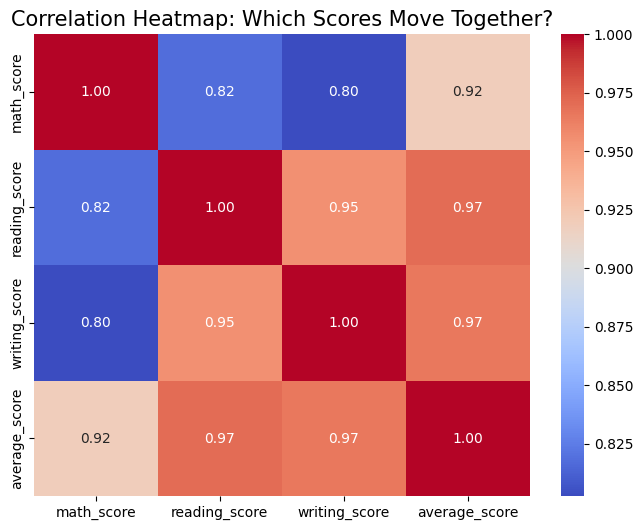

In [11]:
# Cell 8
# Select only the numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Heatmap: Which Scores Move Together?', fontsize=15)
plt.show()


In [12]:
# Cell 9
# Save the clean dataset to a new CSV file
df.to_csv('Cleaned_Student_Performance.csv', index=False)

print("✅ Project Saved! File 'Cleaned_Student_Performance.csv' is ready.")


✅ Project Saved! File 'Cleaned_Student_Performance.csv' is ready.
